License regulation

In [ ]:
#This pipel builds upon the sample file from pix2pix developr repo and MIT 4.570 class material
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Import libraries

In [ ]:
pip install Pillow


In [ ]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

## Load the dataset

In [ ]:
PATH = '/content/drive/MyDrive/TrainNew'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import os

def convert_png_to_jpg(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Path to the current PNG file
            png_path = os.path.join(folder_path, filename)

            # Open the PNG file
            with Image.open(png_path) as img:
                # Remove alpha channel (transparency) if present
                if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                    alpha = img.convert('RGBA').split()[-1]
                    bg = Image.new("RGB", img.size, (255, 255, 255))
                    bg.paste(img.convert('RGBA'), mask=alpha)
                    img = bg
                else:
                    img = img.convert('RGB')

                # Define the JPG path (same name, different extension)
                jpg_path = os.path.splitext(png_path)[0] + '.jpg'

                # Save the image in JPG format
                img.save(jpg_path, 'JPEG', quality=95)

            # Remove the original PNG file
            os.remove(png_path)

# Example usage
folder_path = '/content/drive/MyDrive/TestNew'
convert_png_to_jpg(folder_path)
folder_path = '/content/drive/MyDrive/TrainNew'
convert_png_to_jpg(folder_path)

In [ ]:
import os

def rename_jpgs_sequentially(folder_path):
    # Get all jpg files in the folder
    jpg_files = [file for file in os.listdir(folder_path) if file.lower().endswith('.jpg')]
    jpg_files.sort()  # Sort the files to maintain any order, if required

    # Loop through each file and rename
    for index, file in enumerate(jpg_files, start=1):
        # Construct old and new file paths
        old_file = os.path.join(folder_path, file)
        new_file = os.path.join(folder_path, f"train{index}.jpg")

        # Rename the file
        os.rename(old_file, new_file)


    print(f"Renamed {len(jpg_files)} files.")

# Example usage
folder_path = '/content/drive/MyDrive/TrainNew'
rename_jpgs_sequentially(folder_path)


Renamed 35 files.


Sample image shape: (256, 512, 3)


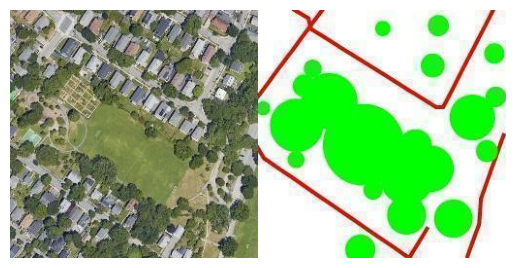

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

def read_images_from_directory(directory):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg')]
    images = []
    for image_file in image_files:
        image = tf.io.read_file(image_file)
        image = tf.io.decode_jpeg(image)
        images.append(image)
    return images

# Example usage:
directory = '/content/drive/MyDrive/TrainNew'  # Update with your directory path
images = read_images_from_directory(directory)

# Output the first image
sample_image = images[0]
print("Sample image shape:", sample_image.shape)
plt.imshow(sample_image)
plt.axis('off')
plt.show()



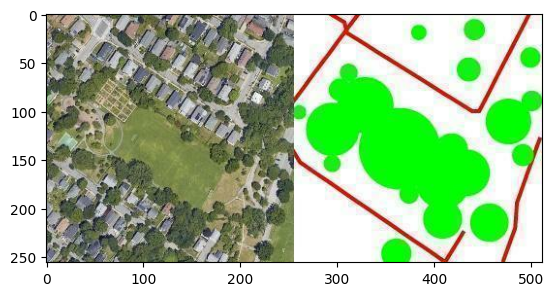

In [ ]:
plt.figure()
plt.imshow(sample_image)

In [ ]:
from PIL import Image
import os

def flip_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)

            # Open the image
            img = Image.open(file_path)

            # Assuming the image size is 512x256, split it into two halves
            left_half = img.crop((256, 0, 512, 256))
            right_half = img.crop((0, 0, 256, 256))

            # Create a new blank image with the same size
            new_img = Image.new('RGB', (512, 256))

            # Paste the left half where the right half was and vice versa
            new_img.paste(left_half, (0, 0))
            new_img.paste(right_half, (256, 0))

            # Save the modified image back to disk
            new_img.save(file_path)
            print(f"Processed {filename}")

# Specify the folder containing your images
folder_path = '/content/drive/MyDrive/TrainNew'
flip_images_in_folder(folder_path)
folder_path = '/content/drive/MyDrive/TestNew'
flip_images_in_folder(folder_path)



Processed train4.jpg
Processed train26 (1).jpg
Processed train43.jpg
Processed train27.jpg
Processed train11 (1).jpg
Processed train34 (1).jpg
Processed train32 (1).jpg
Processed train10 (1).jpg
Processed train24.jpg
Processed train33 (1).jpg
Processed train12 (1).jpg
Processed train10.jpg
Processed train25 (1).jpg
Processed train21.jpg
Processed train1.jpg
Processed train6.jpg
Processed train5.jpg
Processed train22 (1).jpg
Processed train23 (1).jpg
Processed train20 (1).jpg
Processed train7.jpg
Processed train36.jpg
Processed train2.jpg
Processed train26.jpg
Processed train13.jpg
Processed train12.jpg
Processed train21 (1).jpg
Processed train3.jpg
Processed train19 (1).jpg
Processed train8.jpg
Processed train22.jpg
Processed train11.jpg
Processed train24 (1).jpg
Processed train25.jpg
Processed train23.jpg
Processed train14.jpg
Processed train15.jpg
Processed train9.jpg
Processed train37.jpg
Processed test-09_horizontal.jpg
Processed test-06_horizontal.jpg
Processed test-07_horizontal.

In [ ]:
from pathlib import Path

# Assuming PATH is a string representing a directory path
PATH = '/content/drive/MyDrive/TrainNew'

# Convert the string to a pathlib.Path object
path_obj = Path(PATH)

# Access the parent directory
parent_dir = path_obj

# List the contents of the parent directory
contents = list(parent_dir.iterdir())

print(list(parent_dir.iterdir()))

[PosixPath('/content/drive/MyDrive/TrainNew/train4.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train34.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train43.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train35.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train19.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train34 (1).jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train40.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train18.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train24.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train41.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train20.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train10.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train25 (1).jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train21.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train1.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train6.jpg'), PosixPath('/content/drive/MyDrive/TrainNew/train5.jpg'), PosixPath

Note: each original image is of size `256 x 512` containing two `256 x 256` images:

In [ ]:
import os
import tensorflow as tf

def read_images_from_directory(directory):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg')]
    images = []
    for image_file in image_files:
        image = tf.io.read_file(image_file)
        image = tf.io.decode_jpeg(image)
        images.append(image)
    return images

# Example usage:
directory = '/content/drive/MyDrive/TrainNew'  # Update with your directory path
images = read_images_from_directory(directory)

# Output the first image
sample_image = images[0]
print("Sample image shape:", sample_image.shape)

print(sample_image.shape)

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/drive/MyDrive/TrainNew/train24 (1).jpg; No such file or directory [Op:ReadFile]

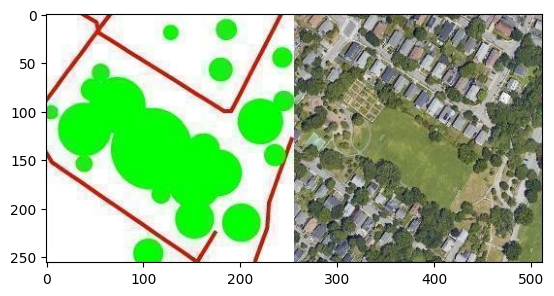

In [ ]:
plt.figure()
plt.imshow(sample_image)

Define a function that loads image files and outputs two image tensors:

In [ ]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

Plot a sample of the input and real images:

/content/drive/MyDrive/TrainNew/train10.jpg


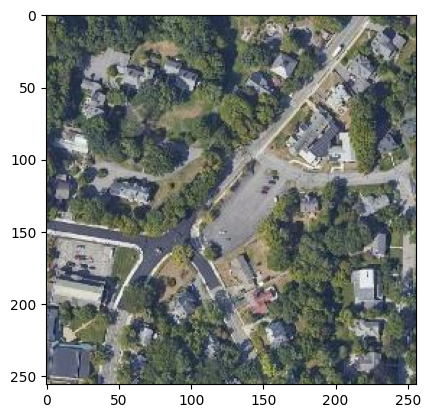

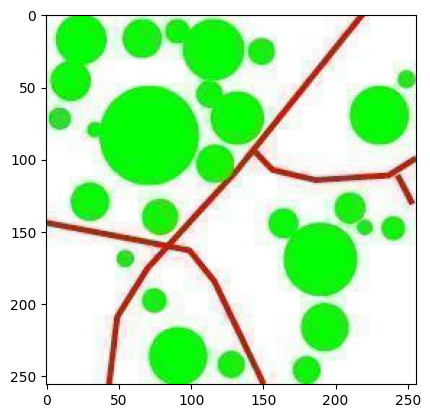

In [ ]:
import os

# Assuming PATH is a string representing a directory path
PATH = '/content/drive/MyDrive/TrainNew'

# Concatenate the directory path with the subdirectory and file name
file_path = os.path.join(PATH, 'train10.jpg')
print(file_path)
# Then, you can load the image using the file path
inp, re = load(file_path)
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(inp / 255.0)
plt.figure()
plt.imshow(re / 255.0)

Func:
1. Resize each `256 x 256` image to a larger height and width—`286 x 286`.
2. Randomly crop it back to `256 x 256`.
3. Randomly flip the image horizontally i.e., left to right (random mirroring).
4. Normalize the images to the `[-1, 1]` range.

In [ ]:
# The facade training set consist of 400 images
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [ ]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [ ]:
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

Define helper functions that load and preprocess the training and test sets:

In [ ]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

## Build an input pipeline with `tf.data`

In [ ]:
from pathlib import Path

# Assuming PATH is a string
PATH = Path('/content/drive/MyDrive/TrainNew')
train_dataset = tf.data.Dataset.list_files(str(PATH / '*.jpg'))

# Create a dataset of file paths
train_dataset = tf.data.Dataset.list_files(str(PATH / '*.jpg'))

# Print the dataset elements (file paths)
for file_path in train_dataset:
    print(file_path)

train_dataset = tf.data.Dataset.list_files(str(PATH / '*.jpg'))
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [ ]:
try:
  test_dataset = tf.data.Dataset.list_files(str(PATH / '*.jpg'))
except tf.errors.InvalidArgumentError:
  test_dataset = tf.data.Dataset.list_files(str(PATH / '*.jpg'))
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Build the generator

- Each block in the encoder is: Convolution -> Batch normalization -> Leaky ReLU
- Each block in the decoder is: Transposed convolution -> Batch normalization -> Dropout (applied to the first 3 blocks) -> ReLU
- There are skip connections between the encoder and decoder (as in the U-Net).

Define the downsampler (encoder):

In [ ]:
OUTPUT_CHANNELS = 3

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [ ]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

Define the upsampler (decoder):

In [ ]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [ ]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

Define the generator with the downsampler and the upsampler:

In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

Visualize the generator model architecture:

In [ ]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

Test the generator:

In [ ]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

### Define the generator loss

- The generator loss is a sigmoid cross-entropy loss of the generated images and an **array of ones**.
- The pix2pix paper also mentions the L1 loss, which is a MAE (mean absolute error) between the generated image and the target image.
- This allows the generated image to become structurally similar to the target image.
- The formula to calculate the total generator loss is `gan_loss + LAMBDA * l1_loss`, where `LAMBDA = 100`. This value was decided by the authors of the paper.

In [ ]:
LAMBDA = 100

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

## Build the discriminator

- Each block in the discriminator is: Convolution -> Batch normalization -> Leaky ReLU.
- The shape of the output after the last layer is `(batch_size, 30, 30, 1)`.
- Each `30 x 30` image patch of the output classifies a `70 x 70` portion of the input image.
- The discriminator receives 2 inputs:
    - The input image and the target image, which it should classify as real.
    - The input image and the generated image (the output of the generator), which it should classify as fake.
    - Use `tf.concat([inp, tar], axis=-1)` to concatenate these 2 inputs together.

Let's define the discriminator:

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

Visualize the discriminator model architecture:

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

Test the discriminator:

In [ ]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

### Define the discriminator loss

- The `discriminator_loss` function takes 2 inputs: **real images** and **generated images**.
- `real_loss` is a sigmoid cross-entropy loss of the **real images** and an **array of ones(since these are the real images)**.
- `generated_loss` is a sigmoid cross-entropy loss of the **generated images** and an **array of zeros (since these are the fake images)**.
- The `total_loss` is the sum of `real_loss` and `generated_loss`.

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

## Define the optimizers and a checkpoint-saver


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Generate images

Write a function to plot some images during training.

- Pass images from the test set to the generator.
- The generator will then translate the input image into the output.
- The last step is to plot the predictions and _voila_!

Note: The `training=True` is intentional here since you want the batch statistics, while running the model on the test dataset. If you use `training=False`, you get the accumulated statistics learned from the training dataset (which you don't want).

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

Test the function:

In [ ]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

## Training

- For each example input generates an output.
- The discriminator receives the `input_image` and the generated image as the first input. The second input is the `input_image` and the `target_image`.
- Next, calculate the generator and the discriminator loss.
- Then, calculate the gradients of loss with respect to both the generator and the discriminator variables(inputs) and apply those to the optimizer.
- Finally, log the losses to TensorBoard.

In [ ]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

The actual training loop. Since this tutorial can run of more than one dataset, and the datasets vary greatly in size the training loop is setup to work in steps instead of epochs.

- Iterates over the number of steps.
- Every 10 steps print a dot (`.`).
- Every 1k steps: clear the display and run `generate_images` to show the progress.
- Every 5k steps: save a checkpoint.

In [ ]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

This training loop saves logs that you can view in TensorBoard to monitor the training progress.

If you work on a local machine, you would launch a separate TensorBoard process. When working in a notebook, launch the viewer before starting the training to monitor with TensorBoard.

Launch the TensorBoard viewer (Sorry, this doesn't
display on tensorflow.org):

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

You can view the [results of a previous run](https://tensorboard.dev/experiment/lZ0C6FONROaUMfjYkVyJqw) of this notebook on [TensorBoard.dev](https://tensorboard.dev/).

Finally, run the training loop:

In [ ]:
fit(train_dataset, test_dataset, steps=20000)

Interpreting the logs is more subtle when training a GAN (or a cGAN like pix2pix) compared to a simple classification or regression model. Things to look for:

- Check that neither the generator nor the discriminator model has "won". If either the `gen_gan_loss` or the `disc_loss` gets very low, it's an indicator that this model is dominating the other, and you are not successfully training the combined model.
- The value `log(2) = 0.69` is a good reference point for these losses, as it indicates a perplexity of 2 - the discriminator is, on average, equally uncertain about the two options.
- For the `disc_loss`, a value below `0.69` means the discriminator is doing better than random on the combined set of real and generated images.
- For the `gen_gan_loss`, a value below `0.69` means the generator is doing better than random at fooling the discriminator.
- As training progresses, the `gen_l1_loss` should go down.

## Restore the latest checkpoint and test the network

In [ ]:
!ls {checkpoint_dir}

In [ ]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Generate some images using the test set

In [ ]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(10):
  generate_images(generator, inp, tar)